Hệ số w: 0.4141
Bias b: -0.3609
MSE train: 0.0415
MSE test: 0.0456

Kết quả mô hình: y = 0.414 * x + -0.361


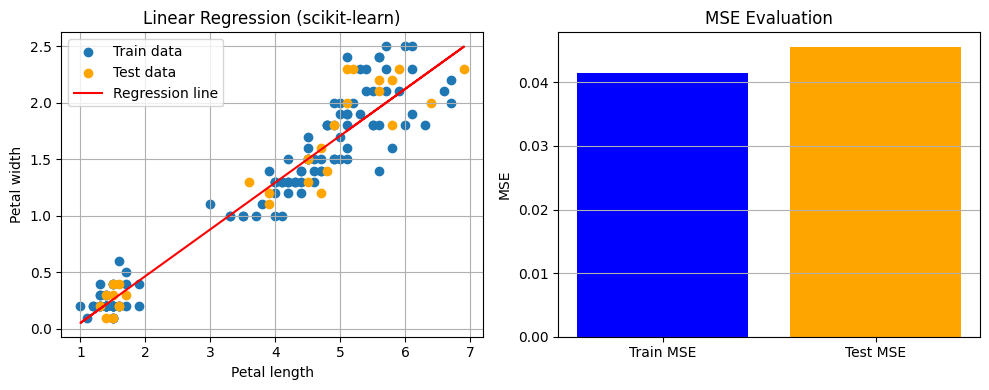

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. Đọc dữ liệu
df = pd.read_csv('iris.csv')
X = df[['petal_length']]  # Phải là dạng 2D cho scikit-learn
y = df['petal_width']

# 2. Tách train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Khởi tạo và huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train) # thư viện

# 4. Dự đoán và đánh giá
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# 5. Thông số mô hình
w = model.coef_[0]
b = model.intercept_

print(f"Hệ số w: {w:.4f}")
print(f"Bias b: {b:.4f}")
print(f"MSE train: {mse_train:.4f}")
print(f"MSE test: {mse_test:.4f}")
print(f"\nKết quả mô hình: y = {w:.3f} * x + {b:.3f}")

# 6. Vẽ biểu đồ
plt.figure(figsize=(10, 4))

# (1) Dữ liệu và đường hồi quy
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, label='Train data')
plt.scatter(X_test, y_test, label='Test data', color='orange')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Linear Regression (scikit-learn)')
plt.legend()
plt.grid()

# (2) Biểu đồ sai số không cần thiết ở đây vì không huấn luyện theo từng epoch
plt.subplot(1, 2, 2)
plt.bar(['Train MSE', 'Test MSE'], [mse_train, mse_test], color=['blue', 'orange'])
plt.title('MSE Evaluation')
plt.ylabel('MSE')
plt.grid(axis='y')

plt.tight_layout()
plt.show()
